Back to the [README](./README.md)

Back to the [superficial insight notebook](./03-superficial-insight.ipynb)

--------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from setup import Col

In [3]:
df = pd.read_csv('data/preprocessed.csv')

--------------------

# Isolating `df_low`

`df_low` is the name that we will give the data frame which contains all the data
points on the lowest of the three `charges` levels over the age.  As a reminder,
we are looking at the following data:

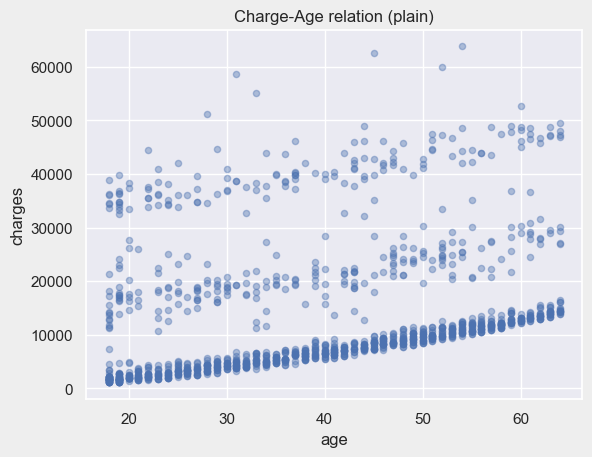

In [4]:
# Plain Plot
df.plot.scatter(x=Col.age, y=Col.charges, title='Charge-Age relation (plain)', alpha=.4)
plt.show()

We could be looking at a linear correlation between the charges and the age,
although a very smooth curve might not be too far off, either.
However, we shall start with the simplest case and introduce more complexity
only if needed.

We assume that all three levels are based on the same linear function with
the same slope and differ only in their offsets/ intercepts.
$$
c_{i}(a) \stackrel{?}{=} m \cdot a + n_{i} 
$$
where $c_{i, r}$ is the `charges`, $i \in \{1, 2, 3\}$ enumerates the three
levels, $m$ is the slope we assume to find, $a$ is the age and $n_{i}$ the
offset for the individual functions.

If (for the lowest level, $i = 1$) we had $n_{1} = 0$, then we could divide
our charges by the ages to find $m$ being a constant over all ages.  Let us try
that out and see what we get:

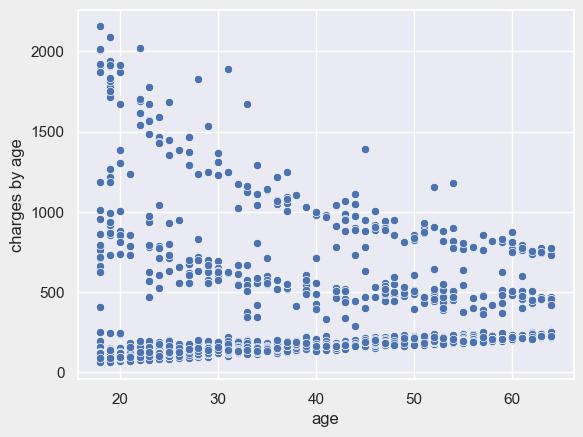

In [5]:
# Create a new column for the new values to plot on the y axis
df['charges by age'] = df.charges / df.age

# Plot the new values
sns.scatterplot(data=df, x=Col.age, y='charges by age')
plt.show()

Not bad, but our assumption is off.  Yet we do get a good grip to introduce a filter
to isolate the lower level from the others:  We see that there is a a limit at around
roughly 250 that separates the lower levels from the others.  (We choose 260, however,
because we would otherwise exclude one or two points that seem to belong to our level.)

Let us apply this limit to filter the data we are going to use moving forward.  And
to convince ourselves of the validity of this choice, let us look at the unfiltered and
the filtered values side-by-side:

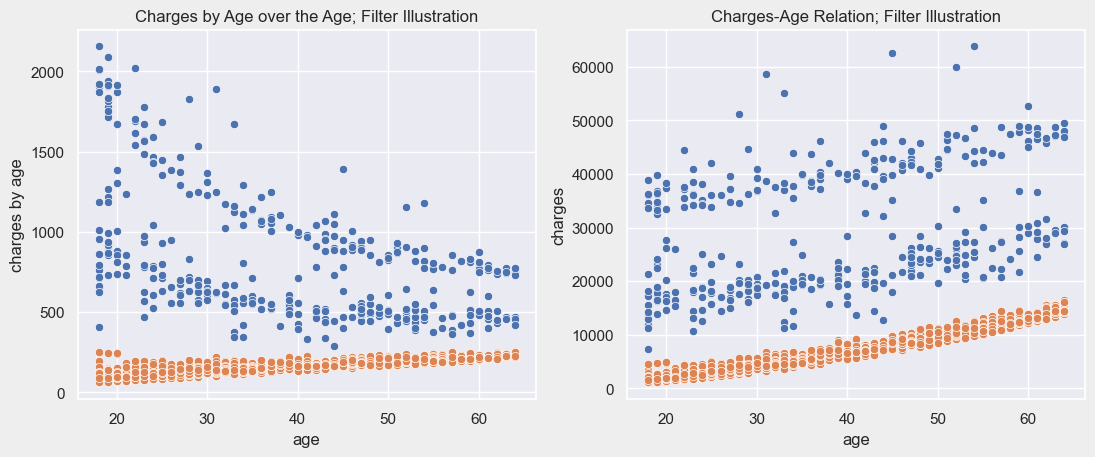

In [6]:
df_low = df[df['charges by age'] < 260].copy()                # df for $i = 1$
plt.figure(figsize=(13, 4.8))
plt.subplot(121)
sns.scatterplot(data=df, x=Col.age, y='charges by age')       # all data points
sns.scatterplot(data=df_low, x=Col.age, y='charges by age')   # only interesting ones
plt.title('Charges by Age over the Age; Filter Illustration')
plt.subplot(122)
sns.scatterplot(data=df, x=Col.age, y=Col.charges)            # all data points
sns.scatterplot(data=df_low, x=Col.age, y=Col.charges)        # only interesting ones
plt.title('Charges-Age Relation; Filter Illustration')
plt.show()

At this point, we successfully isolated the data we want to perform a regression on.
This concludes the purpose of this notebook.  We shall store the isolated data points
in a new `.csv` file and move on to the [next notebook](./05-fitting-df_low.ipynb).

In [7]:
df_low.to_csv('data/df_low.csv', index=False)

--------------------

Back to the [README](./README.md)

To the [next notebook](./05-fitting-df_low.ipynb)